1. Import Libraries

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

2. Data Cleaning

2.1. Explore the data

In [4]:
#import the dataset
df = pd.read_csv('ais_shipinfo.csv')

In [5]:
# view the first five rows of the dataset
pd.set_option('display.max_columns', None)
df.head()

,effective_from,imo_number,ship_id,mmsi,call_sign,ship_name,weight,length,build_year,registered_owner,operator,flag_effective_date,port_of_registry,classification_society,deadweight,breadth,displacement,draught,group_beneficial_owner,ship_manager,technical_manager,shipbuilder,country_of_build,flag_id
0,2012-01-01 00:00:00+00,7726093,150,677040000,5IM500,VENEZIA,2610,86,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-02-12 03:30:12.314334+00,7726093,150,677040000,5IM500,VENEZIA,2610,86,1980,Mantion Shipping Ltd,B&B Shipping Co,2011-10,Zanzibar,Maritime Lloyd Georgia 2009-12,4510.0,14.3,0.0,6.763,B&B Shipping Co,B&B Shipping Co,Mantion Shipping Ltd,Duro Felguera,Spain,TZA
2,2014-02-12 03:30:14.510287+00,9184055,194,356361000,3FFD5,ASPAM SAMRAT,5404,107,1999,Aspam Samrat Shipping Inc,Aurum Ship Management FZE,2012-10,Panama,Nippon Kaiji Kyokai 1999-08,6690.0,19.2,9399.0,6.013,Unknown,Aurum Ship Management FZE,Aurum Ship Management FZE,Tachibana,Japan,PAN
3,2012-01-01 00:00:00+00,9184055,194,356361000,3FFD5,ASPAM SAMRAT,5404,107,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PAN
4,2012-01-01 00:00:00+00,9150377,222,636012754,A8HQ3,NAUTIC,78845,274,1998,Crystal Holdings Ltd,New Shipping Ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LBR


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6135 entries, 0 to 6134
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   effective_from          6135 non-null   object 
 1   imo_number              6135 non-null   int64  
 2   ship_id                 6135 non-null   int64  
 3   mmsi                    5919 non-null   object 
 4   call_sign               5687 non-null   object 
 5   ship_name               6135 non-null   object 
 6   weight                  6135 non-null   int64  
 7   length                  6135 non-null   int64  
 8   build_year              6135 non-null   int64  
 9   registered_owner        6131 non-null   object 
 10  operator                6131 non-null   object 
 11  flag_effective_date     6129 non-null   object 
 12  port_of_registry        5288 non-null   object 
 13  classification_society  5294 non-null   object 
 14  deadweight              6130 non-null   

- There are 6135 records and 24 features

2.2. Handling missing data

2.2.1. Check the missing values of each column

In [7]:
# Calculate the count of missing values for each column
missing_count = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_count / len(df)) * 100

# Combine column name, missing count, and percentage into a DataFrame for better readability
missing_data_summary = pd.DataFrame({
    'Column Name': df.columns,
    'Missing Values Count': missing_count,
    'Missing Values Percentage': missing_percentage
})

# Reset index for better presentation
missing_data_summary.reset_index(drop=True, inplace=True)

# Display the summary
print(missing_data_summary)

               Column Name  Missing Values Count  Missing Values Percentage
0           effective_from                     0                   0.000000
1               imo_number                     0                   0.000000
2                  ship_id                     0                   0.000000
3                     mmsi                   216                   3.520782
4                call_sign                   448                   7.302363
5                ship_name                     0                   0.000000
6                   weight                     0                   0.000000
7                   length                     0                   0.000000
8               build_year                     0                   0.000000
9         registered_owner                     4                   0.065200
10                operator                     4                   0.065200
11     flag_effective_date                     6                   0.097800
12        po

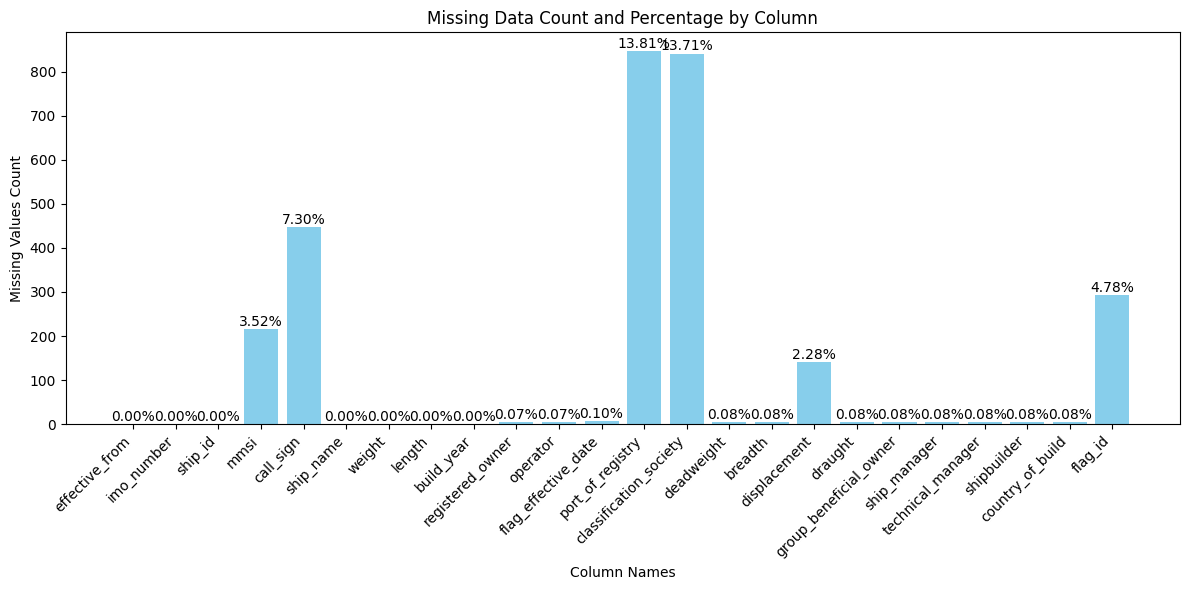

In [8]:
# Plotting the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(
    missing_data_summary['Column Name'],
    missing_data_summary['Missing Values Count'],
    color='skyblue'
)

# Annotating percentage values on top of the bars
for bar, percentage in zip(bars, missing_data_summary['Missing Values Percentage']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        bar.get_height() + 0.5,            # y-coordinate
        f'{percentage:.2f}%',              # text
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Adding labels and title
plt.xlabel('Column Names')
plt.ylabel('Missing Values Count')
plt.title('Missing Data Count and Percentage by Column')
plt.xticks(rotation=45, ha='right')  # Rotate column names for better visibility
plt.tight_layout()

# Show the plot
plt.show()

- Few columns have missing values. 
- Both 'port_of_registry' and 'classification_society' columns have nearly 1000 missing values out of 6000 records. Let's remove those columns from the dataset. 
- Rest of the records that have missing values are removed.

2.2.2. Remove the columns that have high missing value percentage

In [9]:
# Drop the specified columns
df = df.drop(columns=['port_of_registry', 'classification_society'])

# Display the updated dataset shape
print("Updated dataset shape:", df.shape)


Updated dataset shape: (6135, 22)


2.2.3. Remove the rows that have the missing values

In [10]:
# Remove all rows with any missing values
df = df.dropna()

# Display the new shape of the dataset
print("Rows removed. New dataset shape:", df.shape)


Rows removed. New dataset shape: (5470, 22)


2.3. Create the target column. 'flag_change'

- The logic behind the target column is to track changes in specific column for each ship over time. By grouping the data by 'imo_number' and sorting by 'effective_from' date, the 'flag_change' can be detected when a ship's attribute like 'flag_id' has changed. Then we can note the flag chnage cell as 1 and others as 0.

2.3.1. Sort the dataset from 'effective_from' date

In [11]:
# Sort the dataset by the 'effective_from' column
df = df.sort_values(by='effective_from')

# Reset the index after sorting
df = df.reset_index(drop=True)

# Display the first few rows to confirm sorting
df.head()

,effective_from,imo_number,ship_id,mmsi,call_sign,ship_name,weight,length,build_year,registered_owner,operator,flag_effective_date,deadweight,breadth,displacement,draught,group_beneficial_owner,ship_manager,technical_manager,shipbuilder,country_of_build,flag_id
0,2012-01-01 00:00:00+00,9208473,592,636011246,ELXV4,NORDIC RUTH,23842,183,2000,Nordic Shipholding BV,Handytankers K/S,2008-10,35820.0,27.4,44304.0,11.017,Nordic Shipholding A/S,Nordic Shipholding A/S,TB Marine Shipmanagement,Daedong Shipbuilding - Jinhae,"Korea, South",LBR
1,2012-01-01 00:00:00+00,9322126,363,538002814,V7LV4,SEA POWER,8539,128,2007,Sea Power Shipholding SA,Perosea Shipping Co SA,2007-04,13096.0,20.4,17472.0,8.714,Perosea Shipping Co SA,Perosea Shipping Co SA,Petrochem General Management,21st Century Shipbuilding Co,"Korea, South",MHL
2,2012-01-01 00:00:00+00,9503744,737,357250000,3EQA7,BEHCET C,13675,159,2009,Premium Bulkers Ltd,Canbaz Denizcilik ve Nakliyat,2009-11,22650.0,23.8,27746.0,9.260,Canbaz Denizcilik ve Nakliyat,Canbaz Denizcilik ve Nakliyat,Canbaz Denizcilik ve Nakliyat,Zhejiang Xifeng Shipbuilding,"China, People's Republic Of",PAN
3,2012-01-01 00:00:00+00,9194000,333,256072000,9HKF8,GINALDAG,13815,157,2002,Pal Shipping-7 Co Ltd,Palmali Shipping & Agency,2008-04,19800.0,24.5,27584.0,9.800,Palmali Shipping & Agency,Palmali Shipping & Agency,Palmali Shipping & Agency,Admiralteyskiy,Russia,MLT
4,2012-01-01 00:00:00+00,9194012,187,256074000,9HKH8,BOZDAG,13815,157,2002,Pal Shipping-6 Co Ltd,Palmali Shipping & Agency,2008-04,19800.0,24.5,27584.0,9.800,Palmali Shipping & Agency,Palmali Shipping & Agency,Palmali Shipping & Agency,Admiralteyskiy,Russia,MLT


2.3.2. Create 'flag_change' column

In [12]:
# Assuming df is already sorted by 'effective_from'

# Define a function to create the 'flag_change' column for each imo_number group
def calculate_flag_change(group):
    # Compare the current 'flag_id' with the previous one within the group
    group['flag_change'] = (group['flag_id'] != group['flag_id'].shift()).astype(int)
    group['flag_change'].iloc[0] = 0  # Ensure the first row in the group is always 0
    return group

# Group by 'imo_number' and apply the function
df = df.groupby('imo_number', group_keys=False).apply(calculate_flag_change)

# Reset the index (if needed) and ensure 'flag_change' is the last column
#df = df.reset_index(drop=True)

# Move 'flag_change' to the last column (just in case)
flag_change_column = df.pop('flag_change')
df['flag_change'] = flag_change_column

# Display the updated dataset
df.head()


/tmp/ipykernel_4454/2687920968.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  group['flag_change'].iloc[0] = 0  # Ensure the first row in the group is always 0
/tmp/ipykernel_4454/2687920968.py:7: FutureWarning: ChainedAssignmentError: 

,effective_from,imo_number,ship_id,mmsi,call_sign,ship_name,weight,length,build_year,registered_owner,operator,flag_effective_date,deadweight,breadth,displacement,draught,group_beneficial_owner,ship_manager,technical_manager,shipbuilder,country_of_build,flag_id,flag_change
0,2012-01-01 00:00:00+00,9208473,592,636011246,ELXV4,NORDIC RUTH,23842,183,2000,Nordic Shipholding BV,Handytankers K/S,2008-10,35820.0,27.4,44304.0,11.017,Nordic Shipholding A/S,Nordic Shipholding A/S,TB Marine Shipmanagement,Daedong Shipbuilding - Jinhae,"Korea, South",LBR,0
1,2012-01-01 00:00:00+00,9322126,363,538002814,V7LV4,SEA POWER,8539,128,2007,Sea Power Shipholding SA,Perosea Shipping Co SA,2007-04,13096.0,20.4,17472.0,8.714,Perosea Shipping Co SA,Perosea Shipping Co SA,Petrochem General Management,21st Century Shipbuilding Co,"Korea, South",MHL,0
2,2012-01-01 00:00:00+00,9503744,737,357250000,3EQA7,BEHCET C,13675,159,2009,Premium Bulkers Ltd,Canbaz Denizcilik ve Nakliyat,2009-11,22650.0,23.8,27746.0,9.260,Canbaz Denizcilik ve Nakliyat,Canbaz Denizcilik ve Nakliyat,Canbaz Denizcilik ve Nakliyat,Zhejiang Xifeng Shipbuilding,"China, People's Republic Of",PAN,0
3,2012-01-01 00:00:00+00,9194000,333,256072000,9HKF8,GINALDAG,13815,157,2002,Pal Shipping-7 Co Ltd,Palmali Shipping & Agency,2008-04,19800.0,24.5,27584.0,9.800,Palmali Shipping & Agency,Palmali Shipping & Agency,Palmali Shipping & Agency,Admiralteyskiy,Russia,MLT,0
4,2012-01-01 00:00:00+00,9194012,187,256074000,9HKH8,BOZDAG,13815,157,2002,Pal Shipping-6 Co Ltd,Palmali Shipping & Agency,2008-04,19800.0,24.5,27584.0,9.800,Palmali Shipping & Agency,Palmali Shipping & Agency,Palmali Shipping & Agency,Admiralteyskiy,Russia,MLT,0


In [13]:
# Filter the dataset to show only rows where flag_change is 1
df_flag_change = df[df['flag_change'] == 1]

# Display the filtered dataset
df_flag_change.head()

,effective_from,imo_number,ship_id,mmsi,call_sign,ship_name,weight,length,build_year,registered_owner,operator,flag_effective_date,deadweight,breadth,displacement,draught,group_beneficial_owner,ship_manager,technical_manager,shipbuilder,country_of_build,flag_id,flag_change
643,2014-12-19 03:51:34.478301+00,9356581,2693,212530000,5BDT4,FRAKT FJORD.,2999,89,2008,Tri Frakt AS,K Saetre & Sonner AS,2014-10,4500.0,14.40,0.0,5.790,K Saetre & Sonner AS,K Saetre & Sonner AS,K Saetre & Sonner AS,Apatin Brodogradiliste - SRB,Serbia,CYP,1
720,2015-06-24 03:55:39.606179+00,9555216,6947,564282000,3FKU6,GP B2,4568,102,2010,GP B2 Shipping Inc,Auburn Shipmanagement DMCC,2015-06,6174.0,17.80,8745.0,6.500,Unknown,Auburn Shipmanagement DMCC,Auburn Shipmanagement DMCC,Rongcheng Shenfei Shipbuilding,"China, People's Republic Of",PAN,1
731,2015-07-02 16:33:01.278679+00,9575319,1439,256356000,9HA2849,LERIK.,4681,139,2011,Armada Voyager Three Co Ltd,Palmali Shipping & Agency,2015-04,7109.0,16.60,9574.0,4.600,Palmali Shipping & Agency,Palmali Shipping & Agency,Palmali Shipping & Agency,Besiktas Gemi Insa AS,Turkey,MLT,1
757,2015-07-21 11:57:34.579011+00,9254513,8934,636016918,D5IJ8,SAM TIGER,30011,189,2003,SAM Tiger Inc,Shipping Asset Management SAM,2015-07,52454.0,32.26,0.0,12.020,Shipping Asset Management SAM,Shipping Asset Management SAM,Venturi Fleet Management SA,Tsuneishi Heavy Inds Cebu,Philippines,LBR,1
787,2015-10-15 07:51:10.559518+00,9167083,10671,374411000,3FUD4,ATLANTIC PRODIGY.,6393,132,1997,Golden Sun Overseas Maritime,Alfamarine Shipping Co Ltd,2015-08,8350.0,19.40,11623.0,7.338,Unknown,Alfamarine Shipping Co Ltd,Janamarine Co SA,Hegemann Berne,Germany,PAN,1


- We can conclude that when the flag change is happened, name of the ship, registered owner, operator, group beneficial owner, ship manager and technical manager are changed.

2.4. Feature selection

- 'build_year' column doesn't need for the prediction. Let's convert it to age of the vessel from years. We can substract build year of a vessel from current year (2025)
- 'flag_effective_date' column doesn't need for prediction. Let's substract it from current year and month to get meaningful information. Rename it as 'flag_age'
- 'effective_from', 'imo_number', 'ship_id', 'mmsi' columns don't need for the prediction. We can remove it.

2.4.1. Create 'vessel_age' instead of 'build_year'

In [14]:
# Create 'vessel_age' column by subtracting 'build_year' from 2025
df['vessel_age'] = 2025 - df['build_year']

# Drop the 'build_year' column
df = df.drop(columns=['build_year'])

# Display the first few rows of the updated dataset
df.head()


,effective_from,imo_number,ship_id,mmsi,call_sign,ship_name,weight,length,registered_owner,operator,flag_effective_date,deadweight,breadth,displacement,draught,group_beneficial_owner,ship_manager,technical_manager,shipbuilder,country_of_build,flag_id,flag_change,vessel_age
0,2012-01-01 00:00:00+00,9208473,592,636011246,ELXV4,NORDIC RUTH,23842,183,Nordic Shipholding BV,Handytankers K/S,2008-10,35820.0,27.4,44304.0,11.017,Nordic Shipholding A/S,Nordic Shipholding A/S,TB Marine Shipmanagement,Daedong Shipbuilding - Jinhae,"Korea, South",LBR,0,25
1,2012-01-01 00:00:00+00,9322126,363,538002814,V7LV4,SEA POWER,8539,128,Sea Power Shipholding SA,Perosea Shipping Co SA,2007-04,13096.0,20.4,17472.0,8.714,Perosea Shipping Co SA,Perosea Shipping Co SA,Petrochem General Management,21st Century Shipbuilding Co,"Korea, South",MHL,0,18
2,2012-01-01 00:00:00+00,9503744,737,357250000,3EQA7,BEHCET C,13675,159,Premium Bulkers Ltd,Canbaz Denizcilik ve Nakliyat,2009-11,22650.0,23.8,27746.0,9.260,Canbaz Denizcilik ve Nakliyat,Canbaz Denizcilik ve Nakliyat,Canbaz Denizcilik ve Nakliyat,Zhejiang Xifeng Shipbuilding,"China, People's Republic Of",PAN,0,16
3,2012-01-01 00:00:00+00,9194000,333,256072000,9HKF8,GINALDAG,13815,157,Pal Shipping-7 Co Ltd,Palmali Shipping & Agency,2008-04,19800.0,24.5,27584.0,9.800,Palmali Shipping & Agency,Palmali Shipping & Agency,Palmali Shipping & Agency,Admiralteyskiy,Russia,MLT,0,23
4,2012-01-01 00:00:00+00,9194012,187,256074000,9HKH8,BOZDAG,13815,157,Pal Shipping-6 Co Ltd,Palmali Shipping & Agency,2008-04,19800.0,24.5,27584.0,9.800,Palmali Shipping & Agency,Palmali Shipping & Agency,Palmali Shipping & Agency,Admiralteyskiy,Russia,MLT,0,23


In [15]:
df.shape

(5470, 23)

2.4.2. Create 'flag_age' column

In [16]:
import pandas as pd

# Convert 'flag_effective_date' to datetime, coercing invalid dates to NaT
df['flag_effective_date'] = pd.to_datetime(df['flag_effective_date'], format='%Y-%m', errors='coerce')

# Drop rows with invalid dates (NaT) in 'flag_effective_date'
df = df.dropna(subset=['flag_effective_date'])

# Calculate 'flag_age' in years (difference between 2025-01 and 'flag_effective_date')
reference_date = pd.Timestamp('2025-01-01')
df['flag_age'] = ((reference_date - df['flag_effective_date']).dt.days / 365).astype(int)

# Drop the 'flag_effective_date' column
df = df.drop(columns=['flag_effective_date'])

# Display the updated dataset
df.head()


,effective_from,imo_number,ship_id,mmsi,call_sign,ship_name,weight,length,registered_owner,operator,deadweight,breadth,displacement,draught,group_beneficial_owner,ship_manager,technical_manager,shipbuilder,country_of_build,flag_id,flag_change,vessel_age,flag_age
0,2012-01-01 00:00:00+00,9208473,592,636011246,ELXV4,NORDIC RUTH,23842,183,Nordic Shipholding BV,Handytankers K/S,35820.0,27.4,44304.0,11.017,Nordic Shipholding A/S,Nordic Shipholding A/S,TB Marine Shipmanagement,Daedong Shipbuilding - Jinhae,"Korea, South",LBR,0,25,16
1,2012-01-01 00:00:00+00,9322126,363,538002814,V7LV4,SEA POWER,8539,128,Sea Power Shipholding SA,Perosea Shipping Co SA,13096.0,20.4,17472.0,8.714,Perosea Shipping Co SA,Perosea Shipping Co SA,Petrochem General Management,21st Century Shipbuilding Co,"Korea, South",MHL,0,18,17
2,2012-01-01 00:00:00+00,9503744,737,357250000,3EQA7,BEHCET C,13675,159,Premium Bulkers Ltd,Canbaz Denizcilik ve Nakliyat,22650.0,23.8,27746.0,9.260,Canbaz Denizcilik ve Nakliyat,Canbaz Denizcilik ve Nakliyat,Canbaz Denizcilik ve Nakliyat,Zhejiang Xifeng Shipbuilding,"China, People's Republic Of",PAN,0,16,15
3,2012-01-01 00:00:00+00,9194000,333,256072000,9HKF8,GINALDAG,13815,157,Pal Shipping-7 Co Ltd,Palmali Shipping & Agency,19800.0,24.5,27584.0,9.800,Palmali Shipping & Agency,Palmali Shipping & Agency,Palmali Shipping & Agency,Admiralteyskiy,Russia,MLT,0,23,16
4,2012-01-01 00:00:00+00,9194012,187,256074000,9HKH8,BOZDAG,13815,157,Pal Shipping-6 Co Ltd,Palmali Shipping & Agency,19800.0,24.5,27584.0,9.800,Palmali Shipping & Agency,Palmali Shipping & Agency,Palmali Shipping & Agency,Admiralteyskiy,Russia,MLT,0,23,16


In [17]:
df.shape

(5275, 23)

2.5.2. Remove 'effective_from', 'imo_number', 'ship_id', and 'mmsi' columns

In [18]:
# Drop the 'effective_from' column
df = df.drop(columns=['effective_from','imo_number','ship_id','mmsi'])

# Display the first few rows of the updated dataset
df.shape

(5275, 19)

2.5. Categorical Encoding

In [19]:
df.head()

,call_sign,ship_name,weight,length,registered_owner,operator,deadweight,breadth,displacement,draught,group_beneficial_owner,ship_manager,technical_manager,shipbuilder,country_of_build,flag_id,flag_change,vessel_age,flag_age
0,ELXV4,NORDIC RUTH,23842,183,Nordic Shipholding BV,Handytankers K/S,35820.0,27.4,44304.0,11.017,Nordic Shipholding A/S,Nordic Shipholding A/S,TB Marine Shipmanagement,Daedong Shipbuilding - Jinhae,"Korea, South",LBR,0,25,16
1,V7LV4,SEA POWER,8539,128,Sea Power Shipholding SA,Perosea Shipping Co SA,13096.0,20.4,17472.0,8.714,Perosea Shipping Co SA,Perosea Shipping Co SA,Petrochem General Management,21st Century Shipbuilding Co,"Korea, South",MHL,0,18,17
2,3EQA7,BEHCET C,13675,159,Premium Bulkers Ltd,Canbaz Denizcilik ve Nakliyat,22650.0,23.8,27746.0,9.260,Canbaz Denizcilik ve Nakliyat,Canbaz Denizcilik ve Nakliyat,Canbaz Denizcilik ve Nakliyat,Zhejiang Xifeng Shipbuilding,"China, People's Republic Of",PAN,0,16,15
3,9HKF8,GINALDAG,13815,157,Pal Shipping-7 Co Ltd,Palmali Shipping & Agency,19800.0,24.5,27584.0,9.800,Palmali Shipping & Agency,Palmali Shipping & Agency,Palmali Shipping & Agency,Admiralteyskiy,Russia,MLT,0,23,16
4,9HKH8,BOZDAG,13815,157,Pal Shipping-6 Co Ltd,Palmali Shipping & Agency,19800.0,24.5,27584.0,9.800,Palmali Shipping & Agency,Palmali Shipping & Agency,Palmali Shipping & Agency,Admiralteyskiy,Russia,MLT,0,23,16


In [20]:
df.shape

(5275, 19)

- Let's consider about these categorical features; call_sign, ship_name, registered_owner, operator,  group_beneficial_owner, ship_manager, technical_manager, ship_builder, country_of_build and flag_id

2.5.1. Count the number of unique levels in each categorical feature

In [21]:
# List of categorical features
categorical_features = [
    'call_sign', 'ship_name', 'registered_owner', 'operator', 'group_beneficial_owner',
    'ship_manager', 'technical_manager', 'shipbuilder', 'country_of_build','flag_id'
]

# Create a DataFrame to store the column name and number of unique levels
unique_levels_summary = pd.DataFrame({
    'Column Name': categorical_features,
    'Unique Levels Count': [df[col].nunique() for col in categorical_features]
})

# Display the result
print(unique_levels_summary)

              Column Name  Unique Levels Count
0               call_sign                 1411
1               ship_name                 1762
2        registered_owner                 1606
3                operator                 1497
4  group_beneficial_owner                  874
5            ship_manager                 1494
6       technical_manager                 1310
7             shipbuilder                  576
8        country_of_build                   52
9                 flag_id                  101


- We have many unqiue levels for each categorical column. Therefore, we need to use either frequency encoding or target encoding to convert categorical features to numerical features.  
- We are dealing with a binary categorical target variable. Therefore, let's do the categorical encoding with target encoding because it can directly captures the relationsip with target variable and it is helpful to improve the predictive accuarcy of the model.

2.5.2. Target encoding

2.5.2.1. Handle 'Unknown' levels

- There can be levels as unknown. They don't need for the analysis

In [22]:
# Define the categorical columns to check
categorical_columns = ['call_sign',
    'ship_name', 'registered_owner', 'operator', 'group_beneficial_owner', 
    'ship_manager', 'technical_manager', 'shipbuilder', 'country_of_build', 'flag_id'
]

# Initialize an empty list to store results
missing_data_summary = []

# Check for 'Unknown', 'unknown', and 'UNKNOWN' levels in each categorical column
for col in categorical_columns:
    # Count the occurrences of 'Unknown', 'unknown', or 'UNKNOWN'
    unknown_count = df[col].isin(['Unknown', 'unknown', 'UNKNOWN']).sum()
    
    # Calculate the percentage
    unknown_percentage = (unknown_count / len(df)) * 100
    
    # Append the results to the summary list
    missing_data_summary.append({
        'column': col,
        'count': unknown_count,
        'percentage': unknown_percentage
    })

# Convert the summary list to a DataFrame for better presentation
missing_data_df = pd.DataFrame(missing_data_summary)

# Display the summary
print(missing_data_df)


                   column  count  percentage
0               call_sign      0    0.000000
1               ship_name      0    0.000000
2        registered_owner      1    0.018957
3                operator      0    0.000000
4  group_beneficial_owner   1801   34.142180
5            ship_manager      0    0.000000
6       technical_manager    279    5.289100
7             shipbuilder      0    0.000000
8        country_of_build      0    0.000000
9                 flag_id      0    0.000000


- Let's remove 'group_beneficial_owner' and 'technical_manager' columns from the dataset. 

In [23]:
# Remove 'group_beneficial_owner' and 'technical_manager' columns from the dataset
df = df.drop(columns=['group_beneficial_owner', 'technical_manager'])

df.shape

(5275, 17)

- Remove the unnecessary rows which have Unknown values

In [24]:
# Remove rows where 'registered_owner' has 'Unknown', 'unknown', or 'UNKNOWN'
df = df[~df['registered_owner'].isin(['Unknown', 'unknown', 'UNKNOWN'])]

# Reset the index after removing the rows
df.reset_index(drop=True, inplace=True)

df.shape

(5274, 17)

2.5.2.2. Do the target encoding

- To avoid the information leakage from training set to testing set we have to split the dataset from this point. Then we have to do the encoding process separately for training set and testing set.

In [25]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Display the sizes of the training and testing sets
print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")


Training set size: 4219
Testing set size: 1055


In [26]:
# List of features to target encode
categorical_features = [
    'call_sign', 'ship_name', 'registered_owner', 'operator', 
    'ship_manager', 'shipbuilder', 'country_of_build', 'flag_id'
]

# Target variable
target = 'flag_change'

# Perform target encoding and update `train_df` directly
for feature in categorical_features:
    # Compute the mean of the target for each category in the training set
    target_mean = train_df.groupby(feature)[target].mean()
    
    # Map the mean values to the feature and overwrite it in `train_df`
    train_df[feature] = train_df[feature].map(target_mean)

# Check the updated training dataset
train_df.head()


,call_sign,ship_name,weight,length,registered_owner,operator,deadweight,breadth,displacement,draught,ship_manager,shipbuilder,country_of_build,flag_id,flag_change,vessel_age,flag_age
2980,0.0,0.000000,2745,90,0.0,0.0,3240.0,15.4,0.0,5.750,0.0,0.000000,0.128514,0.260417,0,32,5
4157,0.0,0.166667,38557,193,0.0,0.0,3752.0,27.6,19552.0,6.200,0.0,0.166667,0.153846,0.324841,0,29,2
5091,0.0,0.000000,72408,225,0.0,0.0,27000.0,32.3,0.0,32.600,0.0,0.000000,0.000000,0.048673,0,14,10
295,0.0,0.000000,8539,128,0.0,0.0,13096.0,20.4,17472.0,8.714,0.0,0.000000,0.089679,0.048673,0,18,17
1121,0.0,0.000000,28553,182,0.0,0.0,47045.0,32.2,56524.0,12.666,0.0,0.090909,0.128514,0.027027,0,23,12


2.6. Outlier handling

In [27]:
train_df.describe()

,call_sign,ship_name,weight,length,registered_owner,operator,deadweight,breadth,displacement,draught,ship_manager,shipbuilder,country_of_build,flag_id,flag_change,vessel_age,flag_age
count,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000
mean,0.119934,0.119934,22666.190804,151.263807,0.119934,0.119934,32836.894288,23.847597,35697.396776,8.918022,0.119934,0.119934,0.119934,0.119934,0.119934,25.061626,9.688552
std,0.240587,0.238555,34051.455682,72.700851,0.236262,0.228251,53366.583038,11.188865,61132.362624,4.202138,0.228603,0.131608,0.044281,0.107700,0.324922,11.015765,6.387606
min,0.000000,0.000000,127.000000,0.000000,0.000000,0.000000,0.000000,6.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,0.000000,3467.000000,98.000000,0.000000,0.000000,4510.000000,15.900000,188.000000,5.780000,0.000000,0.000000,0.093220,0.048673,0.000000,16.000000,5.000000
50%,0.000000,0.000000,7973.000000,138.000000,0.000000,0.000000,10325.000000,20.400000,10888.000000,8.102000,0.000000,0.090909,0.128514,0.096320,0.000000,23.000000,9.000000
75%,0.166667,0.166667,27987.000000,185.000000,0.142857,0.157895,42648.000000,31.500000,45635.000000,11.500000,0.166667,0.200000,0.131387,0.150538,0.000000,31.000000,14.000000
max,1.000000,1.000000,194308.000000,398.000000,1.000000,1.000000,320300.000000,60.960000,364900.000000,32.600000,1.000000,1.000000,0.500000,1.000000,1.000000,73.000000,60.000000


- It doesn't need to consider about the maximum values of each column and there are not unusual minimum values for each column. 

2.7. Handle the multicollinearity

- Multicollinearity can highly affect for logistic regression model. So, if there are features that have multicollinearity, we can avoid using the regression models like logistic regression.

2.7.1. Plot the correlation plot

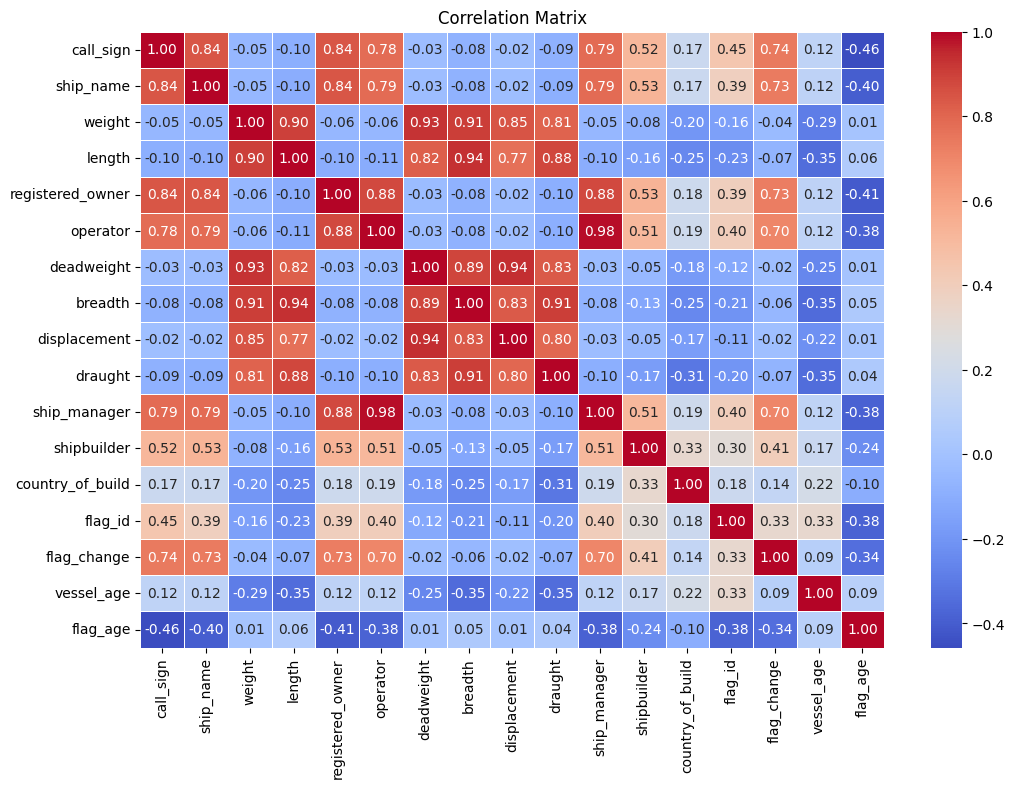

In [28]:
# Compute the correlation matrix for df_train
corr_matrix = train_df.corr()

# Plot the correlation matrix with annotations for each cell (the correlation values)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title
plt.title("Correlation Matrix")

# Show the plot
plt.show()

2.7.2. Variance Inflation Factor (VIF)

- Calculate the VIF for each feature. If the VIF is higher than a threshold (typically 5-10), it suggests high multicollinearity

In [29]:
# Select only numeric features for VIF calculation
numeric_features = train_df.select_dtypes(include=['float64', 'int64'])

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_features.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

# Display VIF values
print(vif_data)

             Feature        VIF
0          call_sign   6.229044
1          ship_name   5.819638
2             weight  22.412708
3             length  70.297454
4   registered_owner   8.515670
5           operator  40.974710
6         deadweight  30.249065
7            breadth  72.519654
8       displacement  11.871338
9            draught  41.942753
10      ship_manager  41.290545
11       shipbuilder   2.957949
12  country_of_build   8.121980
13           flag_id   3.345171
14       flag_change   2.924329
15        vessel_age   7.361107
16          flag_age   4.500714


- There are high multicollinearity for many features. Therefore we have to avoid using regression classification models because regression classification models are highly affected from the multicollinearity.
- SVM and KNN are less affected from the multicollinearity.
- We can mainly focus on tree based models and neural network classification models because they are generally not affected by the multicollinearity.

2.8. Handle class imbalance

2.8.1. Check the count of the unique levels

In [30]:
# Check the data type of the 'flag_change' column
print(train_df['flag_change'].dtype)


int64


In [31]:
# Convert 'flag_change' column from int64 to categorical in train_df
train_df['flag_change'] = train_df['flag_change'].astype('category')

# Check the data type of the 'flag_change' column to confirm the change
print(train_df['flag_change'].dtype)


category


In [32]:
# the actual distribution of levels:
print(train_df['flag_change'].value_counts())

flag_change
0    3713
1     506
Name: count, dtype: int64


/tmp/ipykernel_4454/1395408116.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flag_change_counts.index, y=flag_change_counts.values, palette='viridis')


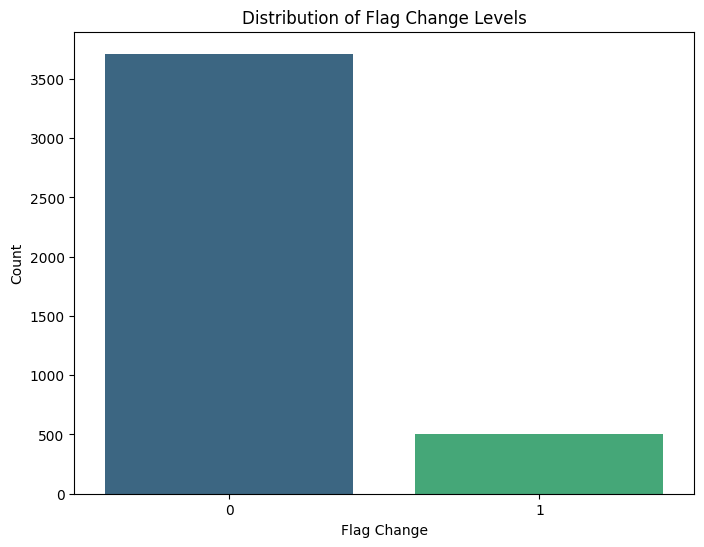

In [33]:
# Get the value counts for 'flag_change' column
flag_change_counts = train_df['flag_change'].value_counts()

# Plot the distribution as a bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=flag_change_counts.index, y=flag_change_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Flag Change')
plt.ylabel('Count')
plt.title('Distribution of Flag Change Levels')

# Display the plot
plt.show()

In [34]:
# Step 1: Separate features and target variable in the training set
X_train = train_df.drop(columns=['flag_change'])  # Drop the target variable column
y_train = train_df['flag_change']  # The target variable column

# Step 2: Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Display the class distribution before and after SMOTE
print(f"Original class distribution in y_train:\n{y_train.value_counts()}")
print(f"Resampled class distribution in y_train_res:\n{y_train_res.value_counts()}")

Original class distribution in y_train:
flag_change
0    3713
1     506
Name: count, dtype: int64
Resampled class distribution in y_train_res:
flag_change
0    3713
1    3713
Name: count, dtype: int64


2.9. Feature Scaling

- min-max scaling is applied for to scale the independent features. Then the values will be between 0 and 1.
- call_sign, ship_name, registered_owner, operator, ship_manager, shipbuilder and flag_id don't need to be scaled because their values are between 0 and 1. 
- Features scaling doesn't affect for tree based classification algorithms because the splitting decision is based on a feature's ability to create pure splits rather than its absolute value, scaling the feature does not change the split points or thresholds selected by the model.
- Feature scaling is affected for the performance neural network model.

In [35]:
# Define the columns to be scaled
columns_to_scale = ['weight', 'length', 'deadweight', 'breadth', 'displacement', 'draught', 'vessel_age', 'flag_age']

# Create a copy of the original dataset to preserve the original data
X_train_scaled = X_train_res.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns in the new dataset
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train_scaled[columns_to_scale])

# Display the updated dataframe
X_train_scaled.head()


,call_sign,ship_name,weight,length,registered_owner,operator,deadweight,breadth,displacement,draught,ship_manager,shipbuilder,country_of_build,flag_id,vessel_age,flag_age
0,0.0,0.000000,0.013482,0.226131,0.0,0.0,0.010116,0.163423,0.000000,0.176380,0.0,0.000000,0.128514,0.260417,0.422535,0.083333
1,0.0,0.166667,0.197908,0.484925,0.0,0.0,0.011714,0.387440,0.053582,0.190184,0.0,0.166667,0.153846,0.324841,0.380282,0.033333
2,0.0,0.000000,0.372235,0.565327,0.0,0.0,0.084296,0.473742,0.000000,1.000000,0.0,0.000000,0.000000,0.048673,0.169014,0.166667
3,0.0,0.000000,0.043320,0.321608,0.0,0.0,0.040887,0.255233,0.047882,0.267301,0.0,0.000000,0.089679,0.048673,0.225352,0.283333
4,0.0,0.000000,0.146389,0.457286,0.0,0.0,0.146878,0.471906,0.154903,0.388528,0.0,0.090909,0.128514,0.027027,0.295775,0.200000


3. Model Training

- Decision Tree

In [36]:
print('Training independent data without scaling (X_train_res):', X_train_res.shape)
print('Training independent data with scaling (X_train_scaled):', X_train_scaled.shape)
print('Training target data  (y_train_res):', y_train_res.shape)

Training independent data without scaling (X_train_res): (7426, 16)
Training independent data with scaling (X_train_scaled): (7426, 16)
Training target data  (y_train_res): (7426,)


In [37]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train_res, y_train_res)

# Make predictions on the training set (or test set if available)
y_pred = dt_classifier.predict(X_train_res)

4. Model Testing

- We need to analyse the testing set according to the training set

In [38]:
test_df.head()

,call_sign,ship_name,weight,length,registered_owner,operator,deadweight,breadth,displacement,draught,ship_manager,shipbuilder,country_of_build,flag_id,flag_change,vessel_age,flag_age
8,E5U2608,ALGA,2854,91,Alga Maritime SA,Lidmar Shipping & Trading Co,2700.0,14.7,0.0,5.000,Lidmar Shipping & Trading Co,Donghai Shipyard,"China, People's Republic Of",COK,0,34,12
4759,BPJQ7,TONG MAO 6,5642,109,Zhejiang Yonghang Shipping Co,Zhejiang Yonghang Shipping Co,8017.0,18.0,0.0,6.600,Zhejiang Yonghang Shipping Co,Taizhou Fangxing Shipbuilding,"China, People's Republic Of",CHN,0,2,1
3809,D5KI3,LADY MOON,16270,167,ES Line Ltd,Emek Deniz Nakliyat San ve Tic,27365.0,26.2,33050.0,9.916,Emek Deniz Nakliyat San ve Tic,Hanjin HI Co Ltd - Ulsan,"Korea, South",LBR,0,28,8
4552,5LNI9,CRATER,40042,225,Crater Star Inc,Bulkseas Marine Management SA,76807.0,32.2,87409.0,14.221,Bulkseas Marine Management SA,Sasebo Heavy Industries,Japan,LBR,0,19,1
4151,5IM434,PSD 104,1734,64,Quartet Solutions LLC,Quartet Solutions LLC,2350.0,15.5,0.0,5.750,Quartet Solutions LLC,Piriou Chantiers,France,TZA,1,26,3


In [39]:
test_df.shape

(1055, 17)

4.1. Categorical encoding using target encoding technique

In [40]:
# List of features to target encode
categorical_features = [
    'call_sign', 'ship_name', 'registered_owner', 'operator', 
    'ship_manager', 'shipbuilder', 'country_of_build', 'flag_id'
]

# Target variable
target = 'flag_change'

# Perform target encoding for train_df first, then for test_df
for feature in categorical_features:
    # Compute the mean of the target for each category in the training set
    target_mean = test_df.groupby(feature)[target].mean()
    
    # Apply the computed mean values to the corresponding feature in both datasets
    test_df[feature] = test_df[feature].map(target_mean)

# Check the updated test dataset
test_df.head()


,call_sign,ship_name,weight,length,registered_owner,operator,deadweight,breadth,displacement,draught,ship_manager,shipbuilder,country_of_build,flag_id,flag_change,vessel_age,flag_age
8,0.0,0.0,2854,91,0.0,0.0,2700.0,14.7,0.0,5.000,0.0,0.0,0.171946,0.076923,0,34,12
4759,0.0,0.0,5642,109,0.0,0.0,8017.0,18.0,0.0,6.600,0.0,0.0,0.171946,0.181818,0,2,1
3809,0.0,0.0,16270,167,0.0,0.0,27365.0,26.2,33050.0,9.916,0.0,0.5,0.126866,0.056962,0,28,8
4552,0.0,0.0,40042,225,0.0,0.0,76807.0,32.2,87409.0,14.221,0.0,0.0,0.107438,0.056962,0,19,1
4151,1.0,1.0,1734,64,1.0,1.0,2350.0,15.5,0.0,5.750,1.0,0.5,0.166667,0.333333,1,26,3


4.2. Separate independent and target variables

In [41]:
# Separate features and target variable in the testing set
X_test = test_df.drop(columns=['flag_change'])  # Drop the target variable column
y_test = test_df['flag_change']  # The target variable column

In [42]:
print('Shape of X_test', X_test.shape)
print('Shape of y_test', y_test.shape)

Shape of X_test (1055, 16)
Shape of y_test (1055,)


4.3. Scaling the selected independent features from min max scalor

In [43]:
# Define the columns to be scaled
columns_to_scale = ['weight', 'length', 'deadweight', 'breadth', 'displacement', 'draught', 'vessel_age', 'flag_age']

# Create a copy of the original dataset to preserve the original data
X_test_scaled = X_test.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns in the new dataset
X_test_scaled[columns_to_scale] = scaler.fit_transform(X_test_scaled[columns_to_scale])

# Display the updated dataframe
X_test_scaled.head()


,call_sign,ship_name,weight,length,registered_owner,operator,deadweight,breadth,displacement,draught,ship_manager,shipbuilder,country_of_build,flag_id,vessel_age,flag_age
8,0.0,0.0,0.014688,0.228643,0.0,0.0,0.008431,0.137143,0.000000,0.163934,0.0,0.0,0.171946,0.076923,0.450704,0.266667
4759,0.0,0.0,0.029036,0.273869,0.0,0.0,0.025033,0.200000,0.000000,0.216393,0.0,0.0,0.171946,0.181818,0.000000,0.022222
3809,0.0,0.0,0.083733,0.419598,0.0,0.0,0.085446,0.356190,0.090573,0.325115,0.0,0.5,0.126866,0.056962,0.366197,0.177778
4552,0.0,0.0,0.206075,0.565327,0.0,0.0,0.239826,0.470476,0.239542,0.466262,0.0,0.0,0.107438,0.056962,0.239437,0.022222
4151,1.0,1.0,0.008924,0.160804,1.0,1.0,0.007338,0.152381,0.000000,0.188525,1.0,0.5,0.166667,0.333333,0.338028,0.066667


In [44]:
# Convert y_test from int64 to categorical data type
y_test = y_test.astype('category')

# Check the updated data type
print(y_test.dtypes)


category


In [45]:
print('Testing independent data without scaling (X_test):', X_test.shape)
print('Testing independent data with scaling (X_test_scaled):', X_test_scaled.shape)
print('Testing target data  (y_test):', y_test.shape)

Testing independent data without scaling (X_test): (1055, 16)
Testing independent data with scaling (X_test_scaled): (1055, 16)
Testing target data  (y_test): (1055,)


In [46]:
# Get the unique values and their counts in y_test
value_counts = y_test.value_counts()

# Display the unique values and counts
print("Unique values and their counts in y_test:")
print(value_counts)


Unique values and their counts in y_test:
flag_change
0    908
1    147
Name: count, dtype: int64


4.4. Testing 

In [47]:
# Make predictions on the test set (X_test)
y_test_pred = dt_classifier.predict(X_test)

5. Model evaluation

- Model evaluation was done by going through the classification report and confusion matrix.
- **Precision**: Among all the vessels predicted to have a flag change, precision tells us the percentage of them that actually had a flag change. It measures the quality of positive prediction.
- **Recall**: Of all the vessels that actually had a flag change, recall tells us the percentage of them that were correctly identified by the model. It measures the ability to find all positive samples.
- **F1 Score**: This is the harmonic mean of precision and recall, giving a balance between the two. It’s useful when we want a balance between precision and recall and there’s an uneven class distribution.
- **Accuracy**: This measures the percentage of all vessel predictions (both flag change and no flag change) that were correct. It gives an overall effectiveness of the model.
- **True Positive (TP)**: The number of instances where the model correctly predicts the positive class.
- **True Negative (TN)**: The number of instances where the model correctly predicts the negative class.
- **False Positive (FP) (Type I Error)**: The number of instances where the model incorrectly predicts the positive class, when it is actually negative.
- **False Negative (FN) (Type II Error)**: The number of instances where the model incorrectly predicts the negative class, when it is actually positive.


5.1. Confusion Matrix

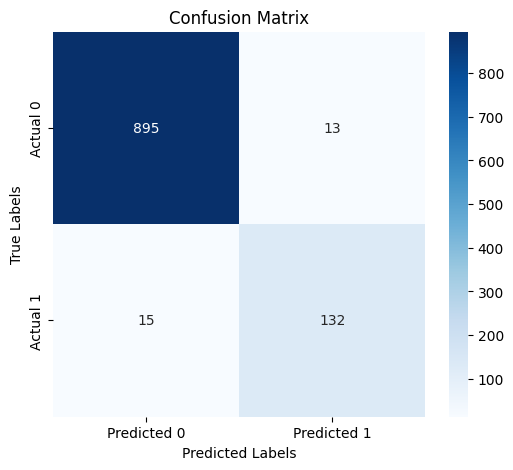

In [48]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

- **True Positive (TP: 132):** These are the cases where the model correctly predicted a flag change. This means 132 vessels actually had a flag change, and the model identified them correctly.
- **True Negative (TN: 895)**: These are the cases where the model correctly predicted no flag change. This means 895 vessels didn't have a flag change, and the model correctly identified them as such.
- **False Positive (FP: 13):** These are the cases where the model incorrectly predicted a flag change. This means the model predicted a flag change for 13 vessels that actually did not have a flag change. These are false alarms.
- **False Negative (FN: 15):** These are the cases where the model incorrectly predicted no flag change. This means the model missed the flag change for 15 vessels that actually had a flag change. These are missed detections.

5.2. Classification report

In [49]:
# Generate the classification report
class_report = classification_report(y_test, y_test_pred)

# Display the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       908
           1       0.91      0.90      0.90       147

    accuracy                           0.97      1055
   macro avg       0.95      0.94      0.94      1055
weighted avg       0.97      0.97      0.97      1055



- **Class 0 (flag isn’t changed):**
1. Precision (0.98): Among the vessels predicted not to have a flag change, 98% were correct.
2. Recall (0.99): Of all vessels that didn’t have a flag change, 99% were correctly identified.

- **Class 1 (flag is changed):**
1. Precision (0.91): Among the vessels predicted to have a flag change, 91% were correct.
2. Recall (0.90): Of all vessels that had a flag change, 90% were correctly identified.

- **Overall Model:**
1. Accuracy (0.97): Overall, 97% of the predictions (both flag change and no flag change) were correct.
2. Model performs very well because of the high f1 score.

5.3. Quality of the model

- Let's focus on the overfitting and the underfitting of the model to decide whether it is a qulaity model or not.
- **Overfitting** - If training performance is much higher than testing performance.
- **Underfitting** - It performs poorly on both the training set and the testing set because it cannot represent the complexity of the data.
- According to the results of the unseen data, the model performs very well and it captures the patterns well. The model was avoided the data leakage to testing data, done the class balancing and all the performances are performed very well.

- Classification report of training data

In [50]:
# Generate predictions on the training data
y_train_pred = dt_classifier.predict(X_train_res)

# Generate the classification report
training_classification_report = classification_report(y_train_res, y_train_pred, target_names=["Class 0", "Class 1"])
print(training_classification_report)

              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98      3713
     Class 1       1.00      0.96      0.98      3713

    accuracy                           0.98      7426
   macro avg       0.98      0.98      0.98      7426
weighted avg       0.98      0.98      0.98      7426



- All the performances are performed very well for the training data same as the testing data, so this model is a high quality model. 